In [7]:
import os
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split

In [8]:
pasta_treino = '/kaggle/vc-master-24-2-dogs-vs-cats'

In [9]:
pasta_treino = 'C:/kaggle/vc-master-24-2-dogs-vs-cats/train'

In [10]:
pasta_submission = 'C:/kaggle/vc-master-24-2-dogs-vs-cats/samples'


In [11]:
try:
    arquivos = os.listdir(pasta_treino)
    arquivos_filtrados = [arquivo for arquivo in arquivos if os.path.isfile(os.path.join(pasta_treino, arquivo))] # Filtra apenas arquivos, excluindo subpastas
    primeiros_5_arquivos = arquivos_filtrados[:5] # Pega os 5 primeiros

    if primeiros_5_arquivos:
        print(f"Os primeiros 5 arquivos da pasta '{pasta_treino}' são:")
        for arquivo in primeiros_5_arquivos:
            print(f"- {arquivo}")
    else:
        print(f"Não foram encontrados arquivos na pasta '{pasta_treino}'.")

except FileNotFoundError:
    print(f"A pasta '{pasta_treino}' não foi encontrada.")
except Exception as e:
    print(f"Ocorreu um erro: {e}")

Os primeiros 5 arquivos da pasta 'C:/kaggle/vc-master-24-2-dogs-vs-cats/train' são:
- cat.0.jpg
- cat.1.jpg
- cat.10.jpg
- cat.100.jpg
- cat.1000.jpg


In [12]:
try:
    arquivos = os.listdir(pasta_submission)
    arquivos_filtrados = [arquivo for arquivo in arquivos if os.path.isfile(os.path.join(pasta_submission, arquivo))] # Filtra apenas arquivos, excluindo subpastas
    primeiros_5_arquivos = arquivos_filtrados[:5] # Pega os 5 primeiros

    if primeiros_5_arquivos:
        print(f"Os primeiros 5 arquivos da pasta '{pasta_submission}' são:")
        for arquivo in primeiros_5_arquivos:
            print(f"- {arquivo}")
    else:
        print(f"Não foram encontrados arquivos na pasta '{pasta_submission}'.")

except FileNotFoundError:
    print(f"A pasta '{pasta_submission}' não foi encontrada.")
except Exception as e:
    print(f"Ocorreu um erro: {e}")

Os primeiros 5 arquivos da pasta 'C:/kaggle/vc-master-24-2-dogs-vs-cats/samples' são:
- 1.jpg
- 10.jpg
- 100.jpg
- 101.jpg
- 102.jpg


In [13]:
# Função para carregar imagens de um diretório e redimensionar
def load_images_from_folder(folder, img_size, labels_dict=None, max_images=None, sort=False):
    images = []
    labels = []

    file_list = os.listdir(folder)
    # Ordenar os arquivos numericamente (por conta do submission file)
    if sort:
        file_list = sorted(file_list, key=lambda x: int(x.split('.')[0]))

    for filename in file_list:
        if max_images and len(images) >= max_images:
            break
        if filename.endswith(".jpg"):
            img_path = os.path.join(folder, filename)
            img = Image.open(img_path).resize((img_size, img_size)).convert('RGB')
            img_array = np.array(img)
            images.append(img_array)
            # Etiquetar as imagens: 0 para gato, 1 para cachorro
            if labels_dict:
                labels.append(labels_dict[filename])
            elif 'cat' in filename:
                labels.append('cat')
            elif 'dog' in filename:
                labels.append('dog')
    return np.array(images), np.array(labels)

# Alterar o test_size para ver se altera o resultado é recomendável? ou apenas alterar os parametros dos modelos?

In [14]:
img_size = 64  # Redimensionar imagens para 64x64 pixels

# Carregar imagens de treino
X_train, y_train = load_images_from_folder(pasta_treino, img_size)

# Para o conjunto de teste, podemos simplesmente carregar as imagens sem etiquetas
# ou usar um conjunto de validação a partir dos dados de treinamento
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

X_submission, _ = load_images_from_folder(pasta_submission, img_size, sort=True)

In [15]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Função para detectar imagens corrompidas
def detect_corrupted_images(folder):
    corrupted_files = []
    for filename in os.listdir(folder):
        if filename.endswith(".jpg"):
            try:
                img = Image.open(os.path.join(folder, filename))
                img.verify()  # Verificar a integridade do arquivo
            except (IOError, SyntaxError) as e:
                corrupted_files.append(filename)
    return corrupted_files

# Detectar imagens corrompidas
corrupted_train_images = detect_corrupted_images(pasta_treino)
print(f"Imagens corrompidas no conjunto de treino: {corrupted_train_images}")

corrupted_submission_images = detect_corrupted_images(pasta_submission)
print(f"Imagens corrompidas no conjunto de submissão: {corrupted_submission_images}")

Imagens corrompidas no conjunto de treino: []
Imagens corrompidas no conjunto de submissão: []


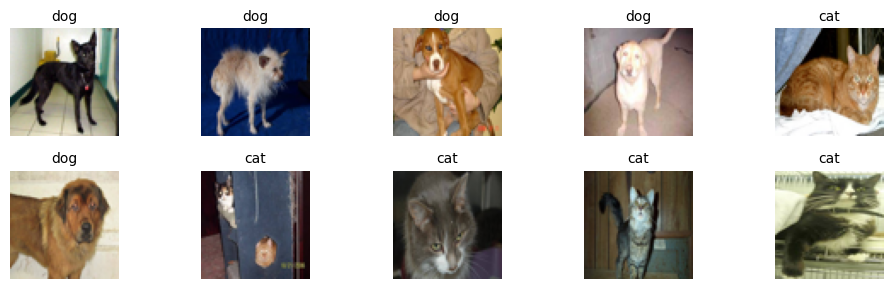

In [16]:
import random

plt.figure(figsize=(10, 3))
for i in range(10):
  rnd = random.randint(0, len(X_train))
  image = X_train[rnd]
  true_label = y_train[rnd]

  plt.subplot(2, 5, i + 1)
  plt.imshow(image, cmap='gray')
  plt.title(f'{true_label}', fontsize=10)
  plt.axis('off')
plt.tight_layout()
plt.show()

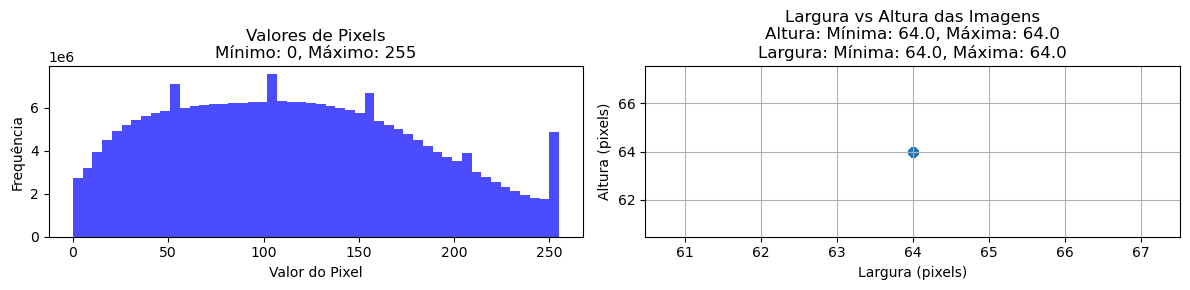

In [17]:
# Obter valores mínimos e máximos dos pixels
pixel_min = np.min(X_train)
pixel_max = np.max(X_train)

# Obter dimensões das imagens
image_heights = X_train.shape[1] * np.ones(X_train.shape[0])
image_widths = X_train.shape[2] * np.ones(X_train.shape[0])

# Plotar valores mínimos e máximos dos pixels
plt.figure(figsize=(12, 3))

plt.subplot(1, 2, 1)
plt.hist(X_train.flatten(), bins=50, color='blue', alpha=0.7)
plt.title(f'Valores de Pixels\nMínimo: {pixel_min}, Máximo: {pixel_max}')
plt.xlabel('Valor do Pixel')
plt.ylabel('Frequência')

# Plotar gráfico de dispersão de largura vs altura
plt.subplot(1, 2, 2)
plt.scatter(image_widths, image_heights, alpha=0.5)
plt.title(f'Largura vs Altura das Imagens\nAltura: Mínima: {image_heights.min()}, Máxima: {image_heights.max()}\nLargura: Mínima: {image_widths.min()}, Máxima: {image_widths.max()}')
plt.xlabel('Largura (pixels)')
plt.ylabel('Altura (pixels)')
plt.grid(True)

plt.tight_layout()
plt.show()

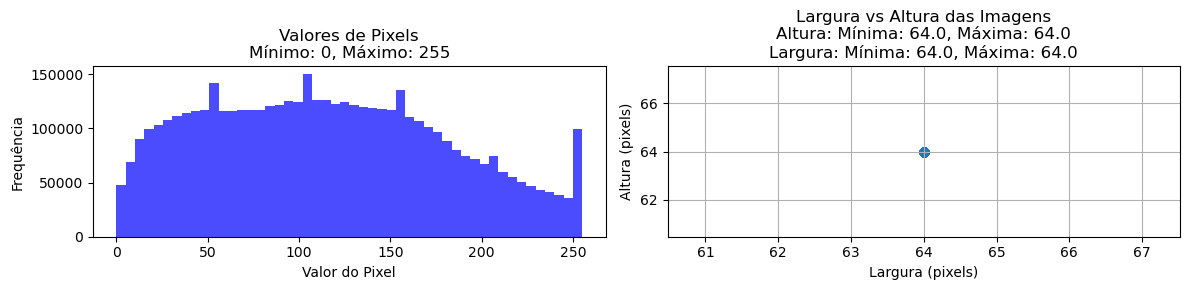

In [18]:
# Base de Submissão
# Obter valores mínimos e máximos dos pixels
pixel_min = np.min(X_submission)
pixel_max = np.max(X_submission)

# Obter dimensões das imagens
image_heights = X_submission.shape[1] * np.ones(X_submission.shape[0])
image_widths = X_submission.shape[2] * np.ones(X_submission.shape[0])

# Plotar valores mínimos e máximos dos pixels
plt.figure(figsize=(12, 3))

plt.subplot(1, 2, 1)
plt.hist(X_submission.flatten(), bins=50, color='blue', alpha=0.7)
plt.title(f'Valores de Pixels\nMínimo: {pixel_min}, Máximo: {pixel_max}')
plt.xlabel('Valor do Pixel')
plt.ylabel('Frequência')

# Plotar gráfico de dispersão de largura vs altura
plt.subplot(1, 2, 2)
plt.scatter(image_widths, image_heights, alpha=0.5)
plt.title(f'Largura vs Altura das Imagens\nAltura: Mínima: {image_heights.min()}, Máxima: {image_heights.max()}\nLargura: Mínima: {image_widths.min()}, Máxima: {image_widths.max()}')
plt.xlabel('Largura (pixels)')
plt.ylabel('Altura (pixels)')
plt.grid(True)

plt.tight_layout()
plt.show()

In [19]:
# Normalizar os dados
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
X_submission = X_submission.astype('float32') / 255.0

In [20]:
# Verificar formas dos dados carregados
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')
print(f'X_submission shape: {X_submission.shape}')

X_train shape: (20000, 64, 64, 3)
y_train shape: (20000,)
X_test shape: (5000, 64, 64, 3)
y_test shape: (5000,)
X_submission shape: (400, 64, 64, 3)


# ==> Pq as contagens estão diferentes do exemplo: Valores únicos: ['cat' 'dog'] , Contagens: [ 9999 10001]

In [21]:
train_unique_values, train_counts = np.unique(y_train, return_counts=True)
print("Valores únicos:", train_unique_values)
print("Contagens:", train_counts)

Valores únicos: ['cat' 'dog']
Contagens: [ 9985 10015]


In [22]:
X_train_flat = X_train.reshape((X_train.shape[0], -1))
X_test_flat = X_test.reshape((X_test.shape[0], -1))
X_submission_flat = X_submission.reshape((X_submission.shape[0], -1))

print(X_train_flat.shape)
print(X_test_flat.shape)
print(X_submission_flat.shape)

(20000, 12288)
(5000, 12288)
(400, 12288)


# Aplicando PCA com 900 componentes

In [23]:
from sklearn.decomposition import PCA

n_components = 900
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_flat)
X_test_pca = pca.transform(X_test_flat)
X_submission_pca = pca.transform(X_submission_flat)

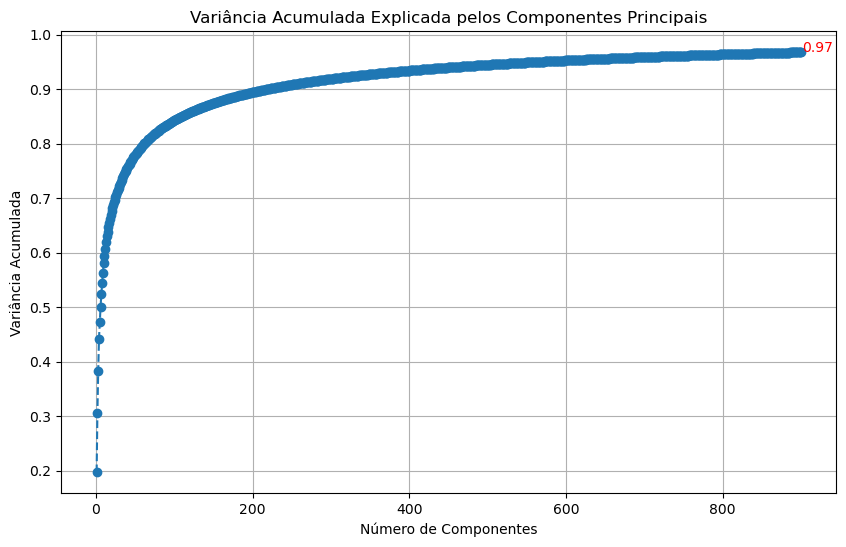

In [24]:
# Plotar variância acumulada
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(10, 6))
plt.plot(range(1, n_components + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Número de Componentes')
plt.ylabel('Variância Acumulada')
plt.title('Variância Acumulada Explicada pelos Componentes Principais')
plt.annotate("{:.2f}".format(cumulative_variance[-1]), xy=(n_components+1, cumulative_variance[-1]), color='red')
plt.grid(True)

# Aplicando modelos KNN, SVM, Random Forest, Regressão Logistica, GaussianNB

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

def train_knn(X_train, y_train):
    model = KNeighborsClassifier(n_neighbors=5)
    model.fit(X_train, y_train)
    return model

def train_svm(X_train, y_train):
    model = SVC()
    model.fit(X_train, y_train)
    return model

def train_decision_tree(X_train, y_train):
    model = DecisionTreeClassifier()
    model.fit(X_train, y_train)
    return model

def train_random_forest(X_train, y_train):
    model = RandomForestClassifier(n_estimators=100)
    model.fit(X_train, y_train)
    return model

def train_logistic_regression(X_train, y_train):
    model = LogisticRegression()
    model.fit(X_train, y_train)
    return model

def train_naive_bayes(X_train, y_train):
    model = GaussianNB()
    model.fit(X_train, y_train)
    return model

model_knn = train_knn(X_train_pca, y_train)
model_svm = train_svm(X_train_pca, y_train)
model_decision_tree = train_decision_tree(X_train_pca, y_train)
model_random_forest = train_random_forest(X_train_pca, y_train)
model_logistic_regression = train_logistic_regression(X_train_pca, y_train)
model_naive_bayes = train_naive_bayes(X_train_pca, y_train)

c:\Users\Leticia\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [26]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [27]:

def predict_and_evaluate(model, X_test, y_test):
    # Inferência
    y_pred = model.predict(X_test)
    
    # Métricas
    print('Acurácia:', accuracy_score(y_test, y_pred))
    print('F1 score:', f1_score(y_test, y_pred, average='weighted'))

    # Matriz de confusão
    conf_matrix = confusion_matrix(y_test, y_pred)

    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
    plt.title('Matriz de Confusão')
    plt.xlabel('Predito')
    plt.ylabel('Verdadeiro')
    plt.show()

Resultados de Treino KNN
Acurácia: 0.73795
F1 score: 0.7374395506948056


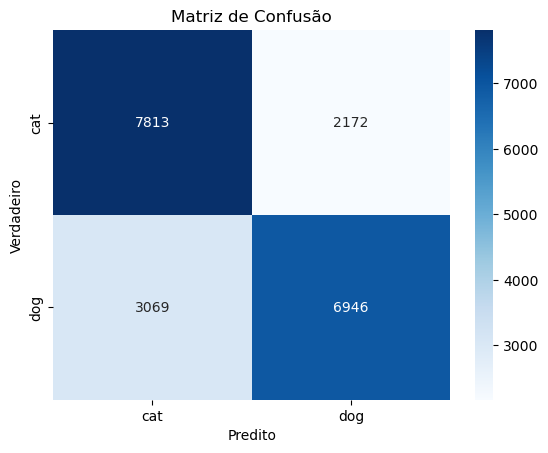

Resultados de Teste KNN
Acurácia: 0.5948
F1 score: 0.5930837408175402


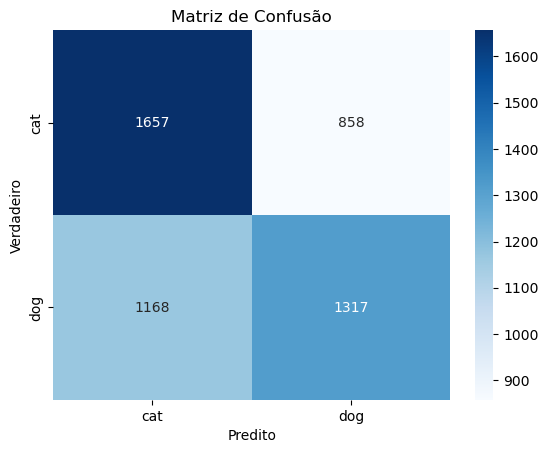

Resultados de Treino SVM
Acurácia: 0.8427
F1 score: 0.8426985276496056


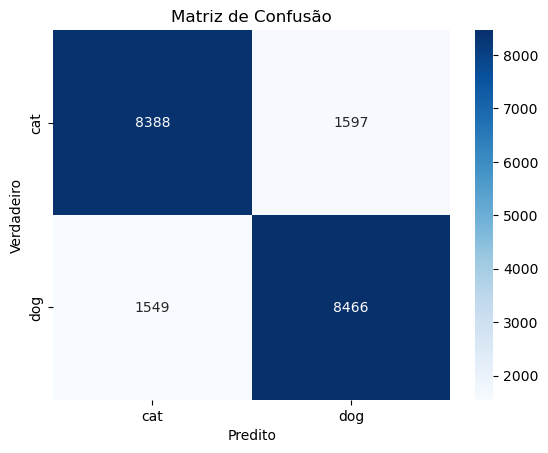

Resultados de Teste SVM
Acurácia: 0.6896
F1 score: 0.689583906986911


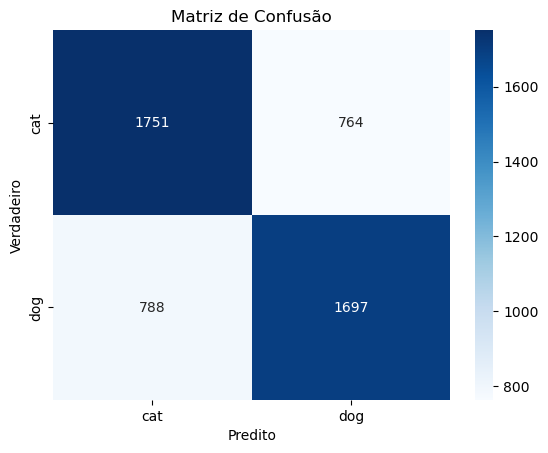

Resultados de Treino Decision Tree
Acurácia: 1.0
F1 score: 1.0


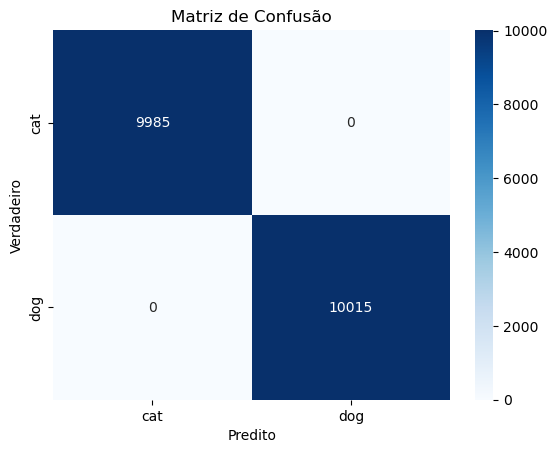

Resultados de Teste Decision Tree
Acurácia: 0.5696
F1 score: 0.5696


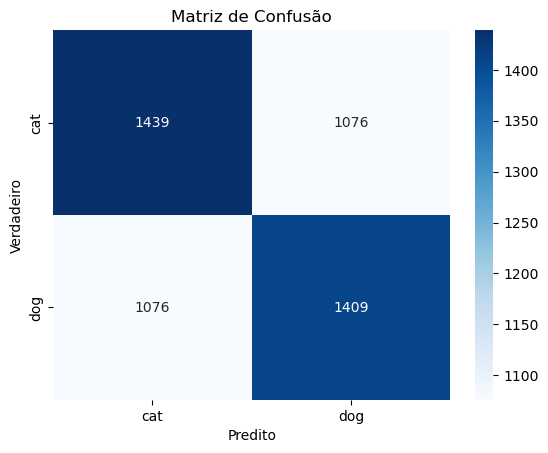

Resultados de Treino Random Forest
Acurácia: 1.0
F1 score: 1.0


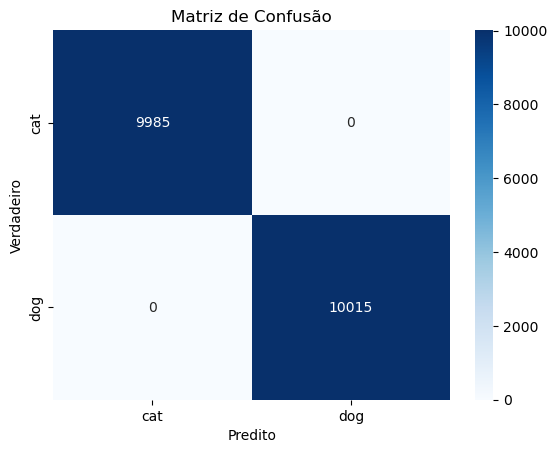

Resultados de Teste Random Forest
Acurácia: 0.6054
F1 score: 0.6052392860062312


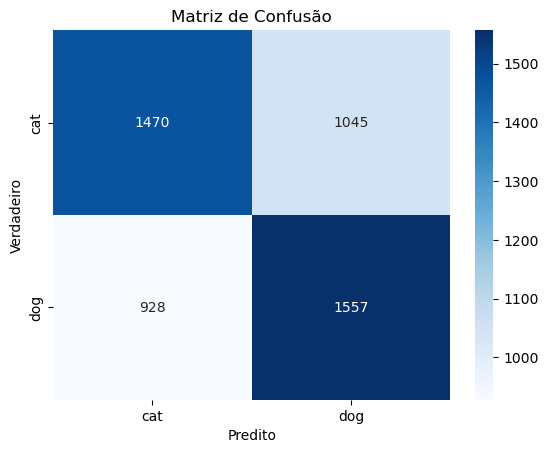

c:\Users\Leticia\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Resultados de Treino Logistic Regression
Acurácia: 0.6593
F1 score: 0.6592678012419007


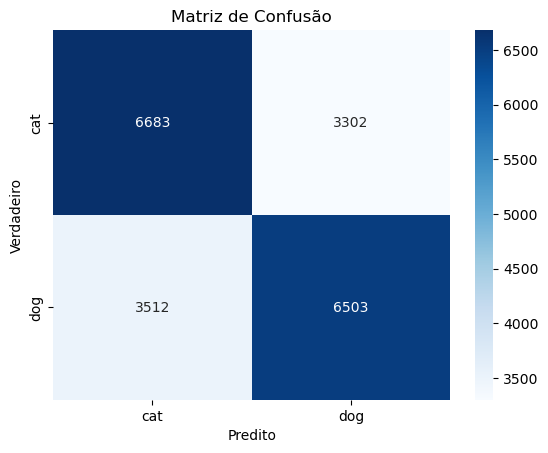

Resultados de Teste Logistic Regression
Acurácia: 0.6102
F1 score: 0.6099788221613557


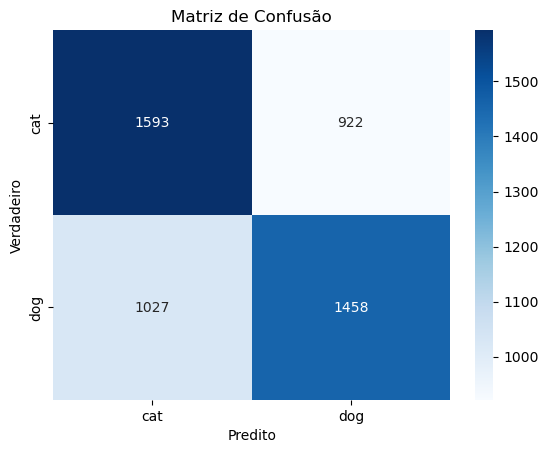

Resultados de Treino Naive Bayes
Acurácia: 0.5813
F1 score: 0.5789224572932026


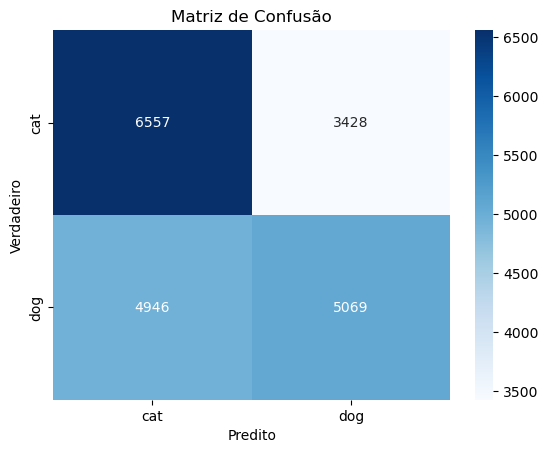

Resultados de Teste Naive Bayes
Acurácia: 0.574
F1 score: 0.5701876448384102


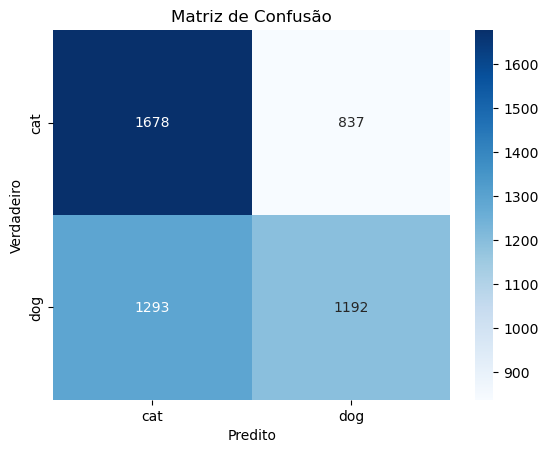

In [28]:
# Supondo que X_train_pca, X_test_pca, y_train, y_test estão definidos
model_knn = train_knn(X_train_pca, y_train)
print('Resultados de Treino KNN')
predict_and_evaluate(model_knn, X_train_pca, y_train)
print('Resultados de Teste KNN')
predict_and_evaluate(model_knn, X_test_pca, y_test)

model_svm = train_svm(X_train_pca, y_train)
print('Resultados de Treino SVM')
predict_and_evaluate(model_svm, X_train_pca, y_train)
print('Resultados de Teste SVM')
predict_and_evaluate(model_svm, X_test_pca, y_test)

model_decision_tree = train_decision_tree(X_train_pca, y_train)
print('Resultados de Treino Decision Tree')
predict_and_evaluate(model_decision_tree, X_train_pca, y_train)
print('Resultados de Teste Decision Tree')
predict_and_evaluate(model_decision_tree, X_test_pca, y_test)

model_random_forest = train_random_forest(X_train_pca, y_train)
print('Resultados de Treino Random Forest')
predict_and_evaluate(model_random_forest, X_train_pca, y_train)
print('Resultados de Teste Random Forest')
predict_and_evaluate(model_random_forest, X_test_pca, y_test)

model_logistic_regression = train_logistic_regression(X_train_pca, y_train)
print('Resultados de Treino Logistic Regression')
predict_and_evaluate(model_logistic_regression, X_train_pca, y_train)
print('Resultados de Teste Logistic Regression')
predict_and_evaluate(model_logistic_regression, X_test_pca, y_test)

model_naive_bayes = train_naive_bayes(X_train_pca, y_train)
print('Resultados de Treino Naive Bayes')
predict_and_evaluate(model_naive_bayes, X_train_pca, y_train)
print('Resultados de Teste Naive Bayes')
predict_and_evaluate(model_naive_bayes, X_test_pca, y_test)

# Modificando o KNN

In [31]:
def train_knn2(X_train, y_train):
    model = KNeighborsClassifier(n_neighbors=8)
    model.fit(X_train, y_train)
    return model

Resultados de Treino KNN
Acurácia: 0.6938
F1 score: 0.687024772957814


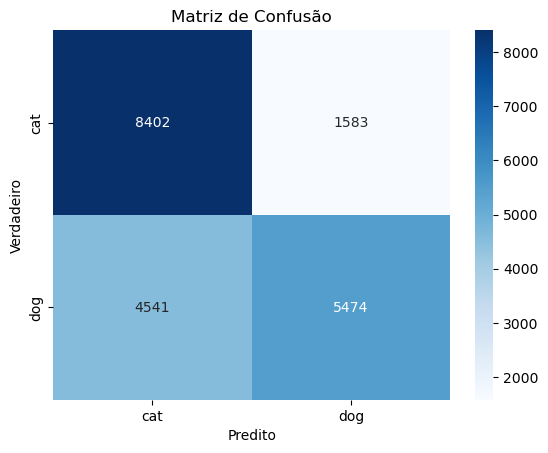

Resultados de Teste KNN
Acurácia: 0.59
F1 score: 0.5787452377379156


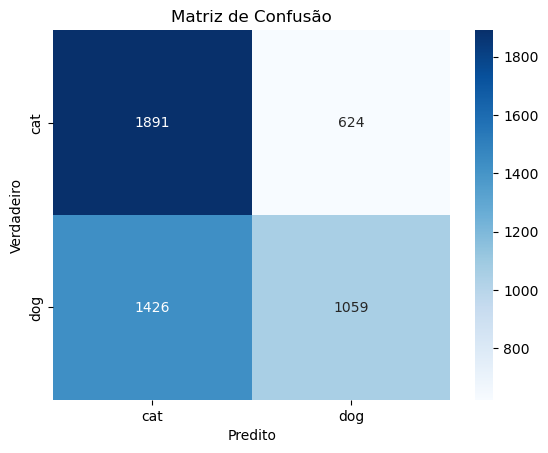

In [32]:
model_knn2 = train_knn2(X_train_pca, y_train)
print('Resultados de Treino KNN')
predict_and_evaluate(model_knn2, X_train_pca, y_train)
print('Resultados de Teste KNN')
predict_and_evaluate(model_knn2, X_test_pca, y_test)

## Levando em consideração os resultados dos testes o que deu melhor resultado foi:
Resultados de Teste SVM
Acurácia: 0.6896
F1 score: 0.6895819200360492

Neste caso devo tentar melhorar este ou cada um dos testes? Como defino se posso utilizar aquele modelo para avaliar os resultados? Se ele será útil? O que eu avalio?

Eu alterei a partir do PCA, isso é um bom critério? 